In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image 

from fit_util import *
from plot_util import *

from sklearn.datasets import fetch_openml

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import LinearSVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline

from scipy.stats import uniform

from sklearn.preprocessing import MinMaxScaler, QuantileTransformer,  MaxAbsScaler, Normalizer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.utils.validation import check_is_fitted
from sklearn.model_selection import RandomizedSearchCV

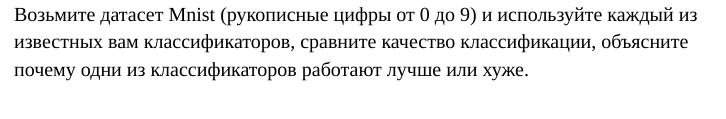

In [2]:
Image("task 3.png")

### Data processing

In [3]:
X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False, data_home='./data/', parser="auto")
print(X.shape)
n_components=64
train_size = 10000
test_size = 5000

(70000, 784)


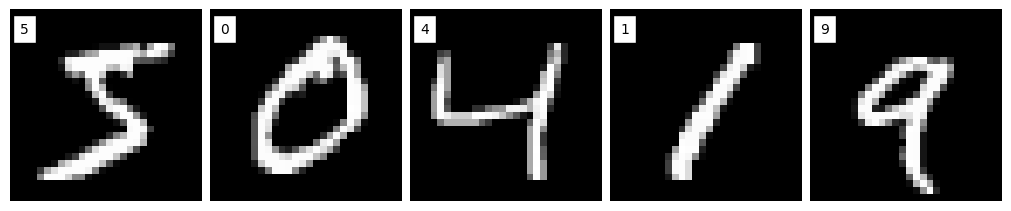

In [4]:
X_scaled = MinMaxScaler().fit_transform(X)
plot_samples(X_scaled, y)

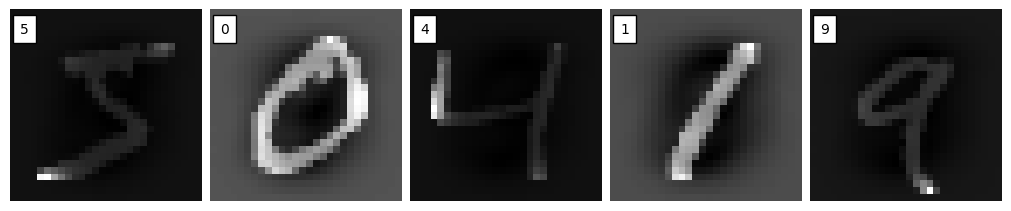

In [5]:
X_std = StandardScaler().fit_transform(X)
plot_samples(X_std, y)

### Logistic regression

In [6]:
lr_mm_ppl = make_pipeline(MinMaxScaler(), LogisticRegression(max_iter=1000, n_jobs=14))
print("logreg + minmax: ")
fit_predict(lr_mm_ppl, X, y, train_size=train_size, test_size=test_size)

lr_ppl = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, n_jobs=14))
print("logreg + std: ")
fit_predict(lr_ppl, X, y, train_size=train_size, test_size=test_size)

lr_ppl_pca = make_pipeline(StandardScaler(), PCA(n_components=n_components, random_state=0), LogisticRegression(max_iter=1000, n_jobs=14))
print("logreg + std + pca: ")
fit_predict(lr_ppl_pca, X, y, train_size=train_size, test_size=test_size)

logreg + minmax: 
Accuracy score: 0.9024
logreg + std: 
Accuracy score: 0.8808
logreg + std + pca: 
Accuracy score: 0.9052


### Support vector machine

In [22]:
svm_mm_ppl = make_pipeline(MinMaxScaler(), LinearSVC(max_iter=100000))
print("svm + minmax: ")
fit_predict(svm_mm_ppl, X, y, train_size=train_size, test_size=test_size)

svm_ppl = make_pipeline(StandardScaler(), LinearSVC(max_iter=100000))
print("svm + std: ")
fit_predict(svm_ppl, X, y, train_size=train_size, test_size=test_size)

svm_ppl_pca = make_pipeline(StandardScaler(), PCA(n_components=n_components, random_state=0), LinearSVC(max_iter=100000))
print("svm + std + pca: ")
fit_predict(svm_ppl_pca, X, y, train_size=train_size, test_size=test_size)

svm + minmax: 
Accuracy score: 0.8876
svm + std: 
Accuracy score: 0.856
svm + std + pca: 
Accuracy score: 0.8934


/home/korzhanevskii/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Decision tree

In [21]:
dt_mm_ppl = make_pipeline(MinMaxScaler(), DecisionTreeClassifier(max_depth=25))
print("dt + minmax: ")
fit_predict(dt_mm_ppl, X, y, train_size=train_size, test_size=test_size)

dt_ppl = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=25))
print("dt + std: ")
fit_predict(dt_ppl, X, y, train_size=train_size, test_size=test_size)

dt_ppl_pca = make_pipeline(StandardScaler(), PCA(n_components=n_components, random_state=0), DecisionTreeClassifier(max_depth=25))
print("dt + std + pca: ")
fit_predict(dt_ppl_pca, X, y, train_size=train_size, test_size=test_size)

dt + minmax: 
Accuracy score: 0.8086
dt + std: 
Accuracy score: 0.8124
dt + std + pca: 
Accuracy score: 0.7718


### Random forest

In [20]:
rf_mm_ppl = make_pipeline(MinMaxScaler(), RandomForestClassifier(n_estimators=100))
print("rf + minmax: ")
fit_predict(rf_mm_ppl, X, y, train_size=train_size, test_size=test_size)

rf_ppl = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100))
print("rf + std: ")
fit_predict(rf_ppl, X, y, train_size=train_size, test_size=test_size)

rf_ppl_pca = make_pipeline(StandardScaler(), PCA(n_components=n_components, random_state=0), RandomForestClassifier(n_estimators=100))
print("rf + std + pca: ")
fit_predict(rf_ppl_pca, X, y, train_size=train_size, test_size=test_size)

rf + minmax: 
Accuracy score: 0.9468
rf + std: 
Accuracy score: 0.945
rf + std + pca: 
Accuracy score: 0.9182


### KNN

In [18]:
knn_mm_ppl = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=10))
print("knn + minmax: ")
fit_predict(knn_mm_ppl, X, y, train_size=train_size, test_size=test_size)

knn_ppl = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=10))
print("knn + std: ")
fit_predict(knn_ppl, X, y, train_size=train_size, test_size=test_size)

knn_ppl_pca = make_pipeline(StandardScaler(), PCA(n_components=n_components, random_state=0), KNeighborsClassifier(n_neighbors=10))
print("knn + std + pca: ")
fit_predict(knn_ppl_pca, X, y, train_size=train_size, test_size=test_size)

knn + minmax: 
Accuracy score: 0.9426
knn + std: 
Accuracy score: 0.9086
knn + std + pca: 
Accuracy score: 0.9292


### Naive Bayes

In [19]:
gc_mm_ppl = make_pipeline(MinMaxScaler(), GaussianNB())
print("gc + minmax: ")
fit_predict(gc_mm_ppl, X, y, train_size=train_size, test_size=test_size)

gc_ppl = make_pipeline(StandardScaler(), GaussianNB())
print("gc + std: ")
fit_predict(gc_ppl, X, y, train_size=train_size, test_size=test_size)

gc_ppl_pca = make_pipeline(StandardScaler(), PCA(n_components=n_components, random_state=0), GaussianNB())
print("gc + std + pca: ")
fit_predict(gc_ppl_pca, X, y, train_size=train_size, test_size=test_size)

gc + minmax: 
Accuracy score: 0.5718
gc + std: 
Accuracy score: 0.5518
gc + std + pca: 
Accuracy score: 0.6838


### Logreg: L1 vs L2

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=train_size, test_size=test_size, random_state=0)

In [13]:
log_r_l1 = LogisticRegression(max_iter=500, penalty='l1', solver='liblinear')
log_r_l1_scores = fit_validate(log_r_l1, X_train, X_test, y_train, y_test)
check_is_fitted(log_r_l1)

log_r_l2 = LogisticRegression(max_iter=500, penalty='l2', solver='liblinear')
log_r_l2_scores = fit_validate(log_r_l2, X_train, X_test, y_train, y_test)
check_is_fitted(log_r_l2)

print("Mean acc for l1 is: %1.2f" % (np.mean(log_r_l1_scores)))
print("Mean acc for l2 is: %1.2f" % (np.mean(log_r_l1_scores)))

Mean acc for l1 is: 0.89
Mean acc for l2 is: 0.89


In [14]:
print("L1: %d zero weights out of %d" % (np.count_nonzero(log_r_l1.coef_==0), (shape:=np.shape(log_r_l1.coef_))[0] * shape[1]))
print("L2: %d zero weights out of %d" % (np.count_nonzero(log_r_l2.coef_==0), (shape:=np.shape(log_r_l2.coef_))[0] * shape[1]))

L1: 5562 zero weights out of 7840
L2: 1120 zero weights out of 7840
